In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import re

## Read the Data

In [9]:
data = "./data/data_for_student_case.csv"
df1 = pd.read_csv(data)

## Number of Transactions

In [10]:
print("Number of rows = " + str(len(df1.index)))
print("Number of fradulent transactions = " + str(len(df1.loc[df1['simple_journal'] == 'Chargeback'])))
print("Number of valid transactions = " + str(len(df1.loc[df1['simple_journal'] == 'Settled'])))  

Number of rows = 290382
Number of fradulent transactions = 345
Number of valid transactions = 236691


## Sample Data

In [11]:
df1.head()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271


## Data Preprocessing

In [45]:
from preprocessing import preprocess
data = "./data/data_for_student_case.csv"
df1 = pd.read_csv(data)
df1 = preprocess(df1)

columns = ['issuercountrycode','txvariantcode','bin','amount','currencycode','shoppercountrycode','shopperinteraction','cardverificationcodesupplied','cvcresponsecode','mail_id','accountcode_cc','ip_id','card_id','amount_eur','countries_equal','day_of_week','hour']
X = df1[columns]
Y = df1['simple_journal'].to_numpy(dtype=np.int)

In [41]:
df1.columns

Index(['txid', 'bookingdate', 'issuercountrycode', 'txvariantcode', 'bin',
       'amount', 'currencycode', 'shoppercountrycode', 'shopperinteraction',
       'simple_journal', 'cardverificationcodesupplied', 'cvcresponsecode',
       'creationdate', 'accountcode', 'mail_id', 'ip_id', 'card_id', 'date',
       'amount_eur', 'accountcode_cc', 'countries_equal', 'day_of_week',
       'hour'],
      dtype='object')

In [33]:
X = df1

## Heat Maps

In [42]:
#correlation matrices
f, (ax1, ax2) = plt.subplots(1,2,figsize =(22, 8))

sns.heatmap(df1.query('simple_journal==1').corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Fraud')

sns.heatmap(df1.query('simple_journal==0').corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('Normal')

plt.show()



UndefinedVariableError: name 'simple_journal' is not defined

# Sharwin's Work

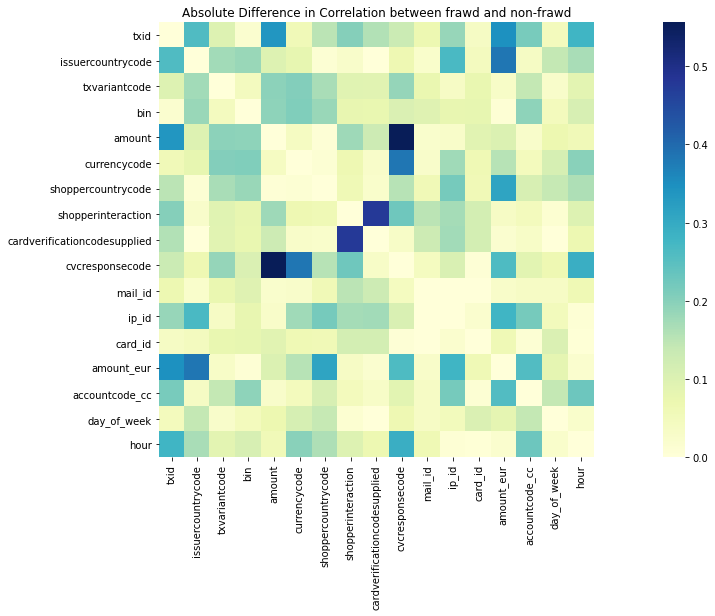

In [43]:
f, (ax1) = plt.subplots(1,figsize =(25, 8))
abs_diff_in_corr = np.abs(df1.query('simple_journal==0').corr() - df1.query('simple_journal==1').corr())
# print(abs_diff_in_corr)
sns.heatmap(abs_diff_in_corr, square=True, cmap = 'YlGnBu')
ax1.set_title('Absolute Difference in Correlation between frawd and non-frawd')
plt.show() 


## Isomap

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA
import numpy as np

In [22]:
frawd_index = np.where(df1['simple_journal'] == 1)[0]

not_frawd_index = np.where(df1['simple_journal'] == 0)[0]
not_frawd_index = np.random.choice(not_frawd_index, size= int (0.01*len(not_frawd_index)), replace=False)

isomap = Isomap(n_components=2, n_jobs=-1, neighbors_algorithm='kd_tree')
isomap.fit(X.iloc[np.union1d(frawd_index, not_frawd_index),:])
X_embedded = isomap.transform(X)
X_embedded.shape

TypeError: invalid type promotion

In [18]:
fig = plt.figure(figsize=(10,8))
plt.scatter(X_embedded[not_frawd_index, 0], X_embedded[not_frawd_index, 1], c='b', alpha=0.4)
plt.scatter(X_embedded[frawd_index, 0], X_embedded[frawd_index, 1], c='r', alpha=0.9)

plt.show()

NameError: name 'X_embedded' is not defined

## PCA: Shows very obscured view
Lets subsample the majority class for displaying 

In [23]:
X_embedded = PCA(n_components=2).fit_transform(X)
frawd_index = np.where(df1['simple_journal'] == 1)[0]

not_frawd_index = np.where(df1['simple_journal'] == 0)[0]
not_frawd_index = np.random.choice(not_frawd_index, size= int (0.1*len(not_frawd_index)), replace=False)

fig = plt.figure(figsize=(10,8))
plt.scatter(X_embedded[not_frawd_index, 0], X_embedded[not_frawd_index, 1], c='b', alpha=0.4)
plt.scatter(X_embedded[frawd_index, 0], X_embedded[frawd_index, 1], c='r')
plt.show()

TypeError: invalid type promotion

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,amount_eur,countries_equal,day_of_week,hour
0,104,2,530056.0,64800.0,2,104,1,1,0,1,187702,7386,73358,30.446979,1,2,23
1,104,2,547046.0,44900.0,2,104,1,1,0,1,834,194109,44739,21.096749,1,3,4
2,104,2,528843.0,149900.0,2,104,1,1,0,1,119287,189655,122802,70.432131,1,3,14
3,104,2,547146.0,109900.0,2,104,1,1,0,1,173561,8254,70712,51.637700,1,4,7
4,104,6,477291.0,89900.0,2,104,1,1,0,1,70647,196247,208481,42.240484,1,2,18
